In [1]:
# imports and definitions
import numpy as np
import pandas as pd
import tensorflow as tf
from IPython.display import display, HTML

# import logs
print(f'tensorflow version: {tf.__version__}')
print(f'num of GPU available: {len(tf.config.list_physical_devices())}')

tensorflow version: 2.10.0
num of GPU available: 2


In [2]:
original_df = pd.read_csv('datasets/new_data.csv')
df = original_df
print(f'working dataset:')
display(df.head(5))

working dataset:


,Dp,Tt,V,q,Tt/Dp,Dmi/Dp,Dmj/Dp,Dmi,Dmj,Vh/Vp
0,6,6,2,35,1.0,1.67,2.17,10.02,13.02,5.42
1,6,6,3,50,1.0,2.17,2.83,13.02,16.98,9.21
2,6,6,4,60,1.0,2.33,3.00,13.98,18.00,10.50
3,6,6,2,70,1.0,0.00,0.00,0.00,0.00,0.00
4,6,6,3,35,1.0,2.33,2.67,13.98,16.02,9.33


In [3]:
# checking of nulls / na
a = pd.DataFrame(df.isnull().sum())
a['# of null values'] = a[0]
null_val = a[['# of null values']]
print(f'Before dropping null values:\n# of Rows, Columns: {df.shape}')
display(null_val)

# removing nulls / na
df = df.dropna(axis=0)
a = pd.DataFrame(df.isnull().sum())
a['# of null values'] = a[0]
null_val = a[['# of null values']]
print(f'After dropping null values:\n# of Rows, Columns: {df.shape}')
display(null_val)

Before dropping null values:
# of Rows, Columns: (36, 10)


,# of null values
Dp,0
Tt,0
V,0
q,0
Tt/Dp,0
Dmi/Dp,0
Dmj/Dp,0
Dmi,0
Dmj,0
Vh/Vp,0


After dropping null values:
# of Rows, Columns: (36, 10)


,# of null values
Dp,0
Tt,0
V,0
q,0
Tt/Dp,0
Dmi/Dp,0
Dmj/Dp,0
Dmi,0
Dmj,0
Vh/Vp,0


c:\Users\adwai\miniconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\adwai\miniconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\adwai\miniconda3\envs\tf\lib\site-packages\pandas\plotting\_matplotlib\misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


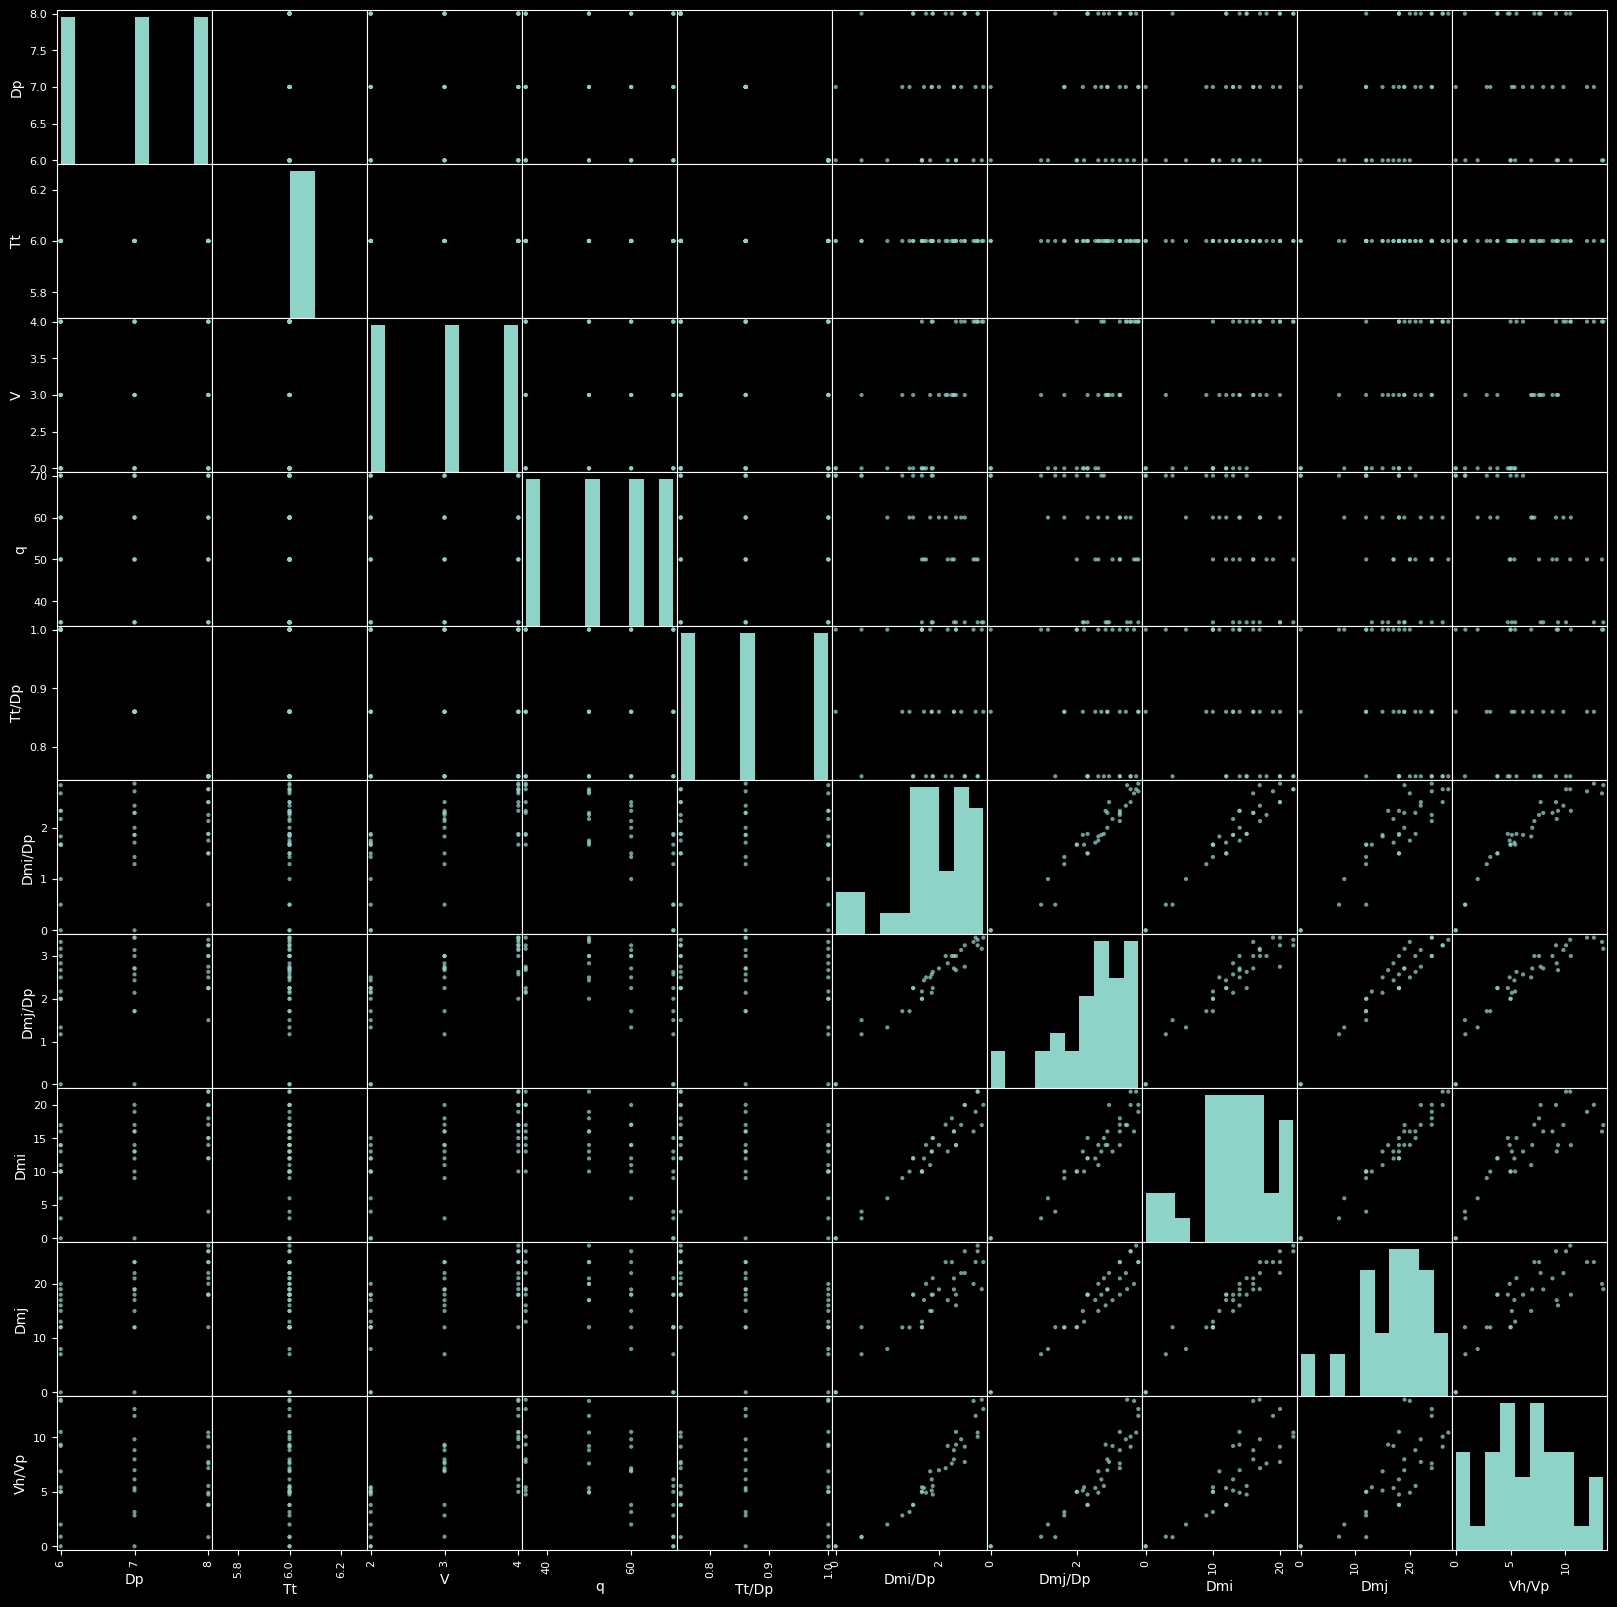

In [4]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
c = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=(20, 20), diagonal='hist')

In [5]:
# feature engineering

display(df.head(10))

,Dp,Tt,V,q,Tt/Dp,Dmi/Dp,Dmj/Dp,Dmi,Dmj,Vh/Vp
0,6,6,2,35,1.0,1.67,2.17,10.02,13.02,5.42
1,6,6,3,50,1.0,2.17,2.83,13.02,16.98,9.21
2,6,6,4,60,1.0,2.33,3.00,13.98,18.00,10.50
3,6,6,2,70,1.0,0.00,0.00,0.00,0.00,0.00
4,6,6,3,35,1.0,2.33,2.67,13.98,16.02,9.33
5,6,6,4,50,1.0,2.67,3.33,16.02,19.98,13.34
6,6,6,2,60,1.0,1.00,1.33,6.00,7.98,2.00
7,6,6,3,70,1.0,0.50,1.17,3.00,7.02,0.88
8,6,6,4,35,1.0,2.83,3.17,16.98,19.02,13.46
9,6,6,2,50,1.0,1.67,2.00,10.02,12.00,5.00


In [6]:
# Split into train and eval
SEED = 1024

traindf = df.sample(frac=0.9, random_state=SEED)
evaldf = df.drop(traindf.index)

print('# of Rows, Columns: ',df.shape)
display(df.head(10))

print(f'traindf shape: {traindf.shape}, evaldf shape: {evaldf.shape}')

# of Rows, Columns:  (36, 10)


,Dp,Tt,V,q,Tt/Dp,Dmi/Dp,Dmj/Dp,Dmi,Dmj,Vh/Vp
0,6,6,2,35,1.0,1.67,2.17,10.02,13.02,5.42
1,6,6,3,50,1.0,2.17,2.83,13.02,16.98,9.21
2,6,6,4,60,1.0,2.33,3.00,13.98,18.00,10.50
3,6,6,2,70,1.0,0.00,0.00,0.00,0.00,0.00
4,6,6,3,35,1.0,2.33,2.67,13.98,16.02,9.33
5,6,6,4,50,1.0,2.67,3.33,16.02,19.98,13.34
6,6,6,2,60,1.0,1.00,1.33,6.00,7.98,2.00
7,6,6,3,70,1.0,0.50,1.17,3.00,7.02,0.88
8,6,6,4,35,1.0,2.83,3.17,16.98,19.02,13.46
9,6,6,2,50,1.0,1.67,2.00,10.02,12.00,5.00


traindf shape: (32, 10), evaldf shape: (4, 10)


In [7]:
n_neurons = 16
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(n_neurons, input_dim=9, activation='relu'),
    tf.keras.layers.Dense(n_neurons, activation='relu'),
    tf.keras.layers.Dense(n_neurons, activation='relu'),
    tf.keras.layers.Dense(1),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [8]:
loss = tf.keras.losses.mean_squared_logarithmic_error
opt = tf.keras.optimizers.Adam()
model.compile(
    loss=loss,
    # optimizer=tf.keras.optimizers.SGD(learning_rate=1e-8),
    optimizer=opt,
    metrics=[
        tf.keras.metrics.MeanSquaredError(),
        # tf.keras.metrics.Accuracy(),
    ]
)

In [9]:
train_labels = traindf.pop('Vh/Vp')
eval_labels = evaldf.pop('Vh/Vp')
# display(train_labels.head(10))
# display(eval_labels.head(10))

In [10]:
%%time
import tensorboard
import datetime
import time

SCALE = 10
BATCH_SIZE=2

log_dir = f'logs/time-{time.time()}'
tensorboard = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

history = model.fit(
    x = traindf, y = train_labels,
    epochs=50,
    validation_split=0.1,
    batch_size=BATCH_SIZE,
    callbacks=[tensorboard]
)

Epoch 1/50


c:\Users\adwai\miniconda3\envs\tf\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


14/14 [==============================] - 3s 27ms/step - loss: 0.2979 - mean_squared_error: 12.2412 - val_loss: 0.0805 - val_mean_squared_error: 3.2847
Epoch 2/50
14/14 [==============================] - 0s 8ms/step - loss: 0.1106 - mean_squared_error: 8.7169 - val_loss: 0.0288 - val_mean_squared_error: 1.5571
Epoch 3/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0749 - mean_squared_error: 6.5728 - val_loss: 0.0169 - val_mean_squared_error: 0.8110
Epoch 4/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0649 - mean_squared_error: 5.3020 - val_loss: 0.0130 - val_mean_squared_error: 0.5360
Epoch 5/50
14/14 [==============================] - 0s 8ms/step - loss: 0.0527 - mean_squared_error: 4.2952 - val_loss: 0.0092 - val_mean_squared_error: 0.5262
Epoch 6/50
14/14 [==============================] - 0s 9ms/step - loss: 0.0517 - mean_squared_error: 4.1038 - val_loss: 0.0273 - val_mean_squared_error: 0.4815
Epoch 7/50
14/14 [==============================]

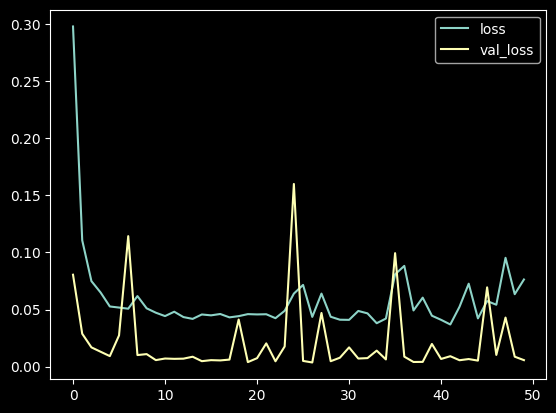

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
# plt.plot(history.history['mean_squared_error'], label='rmse')
plt.legend()
plt.show()

In [12]:
results = model.evaluate(x = evaldf, y = eval_labels)
print(f'test loss, test acc: {results}')

1/1 [==============================] - 0s 136ms/step - loss: 0.0244 - mean_squared_error: 1.9889
test loss, test acc: [0.024449875578284264, 1.9889326095581055]
